c:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


[*********************100%***********************]  12 of 12 completed
AAPL    3409.776651
ALB     2923.666086
AMD     3439.723681
CAT     2098.138412
ETSY    2548.510612
GS      2178.894537
HD      2016.045075
JNJ     1536.552137
KO      1535.954200
PG      1837.758969
TSLA    5958.016067
XOM     1976.528964
Name: 2022-12-30 00:00:00, dtype: float64


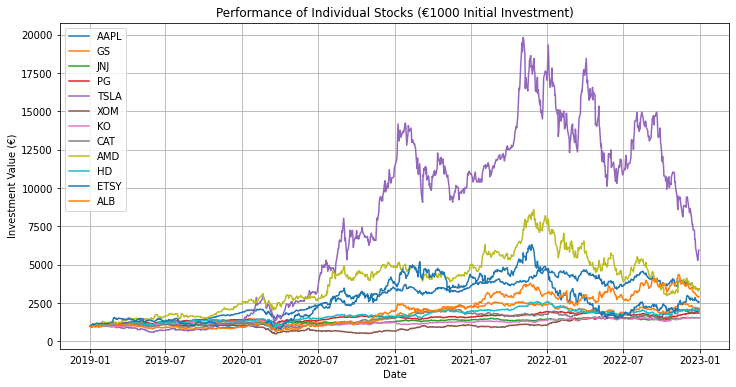

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL', 'GS', 'JNJ', 'PG', 'TSLA', 'XOM', 'KO', 'CAT', 'AMD', 'HD', 'ETSY', 'ALB']
initial_investment = 1000
start_date = '2019-01-01'
end_date = '2023-01-01'

data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

investments = (initial_investment / data.iloc[0]) * data

individual_performance = investments.iloc[-1]

print(individual_performance)

# Plotting the performance of each stock
plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(investments.index, investments[stock], label=stock)

plt.title('Performance of Individual Stocks (€1000 Initial Investment)')
plt.xlabel('Date')
plt.ylabel('Investment Value (€)')
plt.legend()
plt.grid()
plt.show()


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stocks = ['AAPL', 'GS', 'JNJ', 'PG', 'TSLA', 'XOM', 'KO', 'CAT', 'AMD', 'HD', 'ETSY', 'ALB']
start_date = '2019-01-01'
end_date = '2023-01-01'

# Download stock data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Download market index data (S&P 500)
market_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
market_returns = market_data.pct_change().dropna()

# Calculate excess returns
excess_returns = returns.sub(market_returns, axis=0)

# Download risk-free rate data (1-month T-bill)
risk_free_data = yf.download('^IRX', start=start_date, end=end_date)['Adj Close']
risk_free_rate = risk_free_data / (252 * 100)  # Convert annualized rate to daily rate

# Calculate excess market returns
excess_market_returns = market_returns - risk_free_rate

# Calculate the beta of each stock
betas = {}
for stock in stocks:
    cov = excess_returns[stock].cov(excess_market_returns)
    beta = cov / excess_market_returns.var()
    betas[stock] = beta

betas = pd.Series(betas)

# Calculate Treynor ratio
treynor_ratios = excess_returns.mean() / betas

# Calculate Sharpe ratio
sharpe_ratios = (returns.mean() - risk_free_rate.mean()) / returns.std()

# Calculate Jensen's alpha
jensens_alpha = excess_returns.mean() - (betas * excess_market_returns.mean())

performance_ratios = pd.DataFrame({
    'Treynor Ratio': treynor_ratios,
    'Sharpe Ratio': sharpe_ratios,
    'Jensen\'s Alpha': jensens_alpha
})

print(performance_ratios)



[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
      Treynor Ratio  Sharpe Ratio  Jensen's Alpha
AAPL       0.004148      0.064848        0.000821
ALB        0.003554      0.048291        0.000901
AMD        0.002313      0.051249        0.001029
CAT       -0.009813      0.043353        0.000455
ETSY       0.002990      0.042102        0.001038
GS         0.003091      0.044352        0.000408
HD         0.051195      0.044095        0.000348
JNJ        0.000035      0.035983        0.000206
KO        -0.000014      0.033747        0.000165
PG        -0.000445      0.046718        0.000370
TSLA       0.004827      0.062051        0.001926
XOM       -0.004651      0.039159        0.000452


In [4]:
risk_free_rate

Date
2019-01-02    0.000094
2019-01-03    0.000093
2019-01-04    0.000094
2019-01-07    0.000093
2019-01-08    0.000095
                ...   
2022-12-23    0.000166
2022-12-27    0.000166
2022-12-28    0.000172
2022-12-29    0.000170
2022-12-30    0.000169
Name: Adj Close, Length: 1008, dtype: float64

In [ ]:
#performance_ratios.to_excel("performance_ratios1.xlsx")

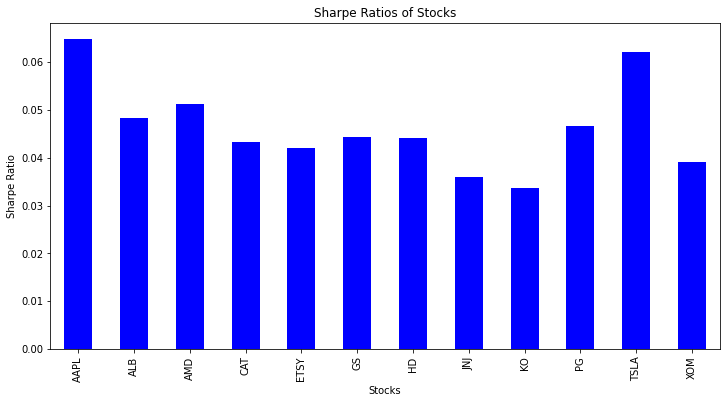

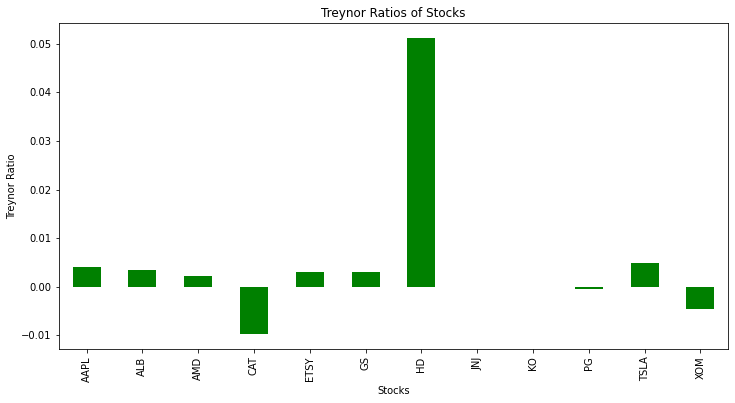

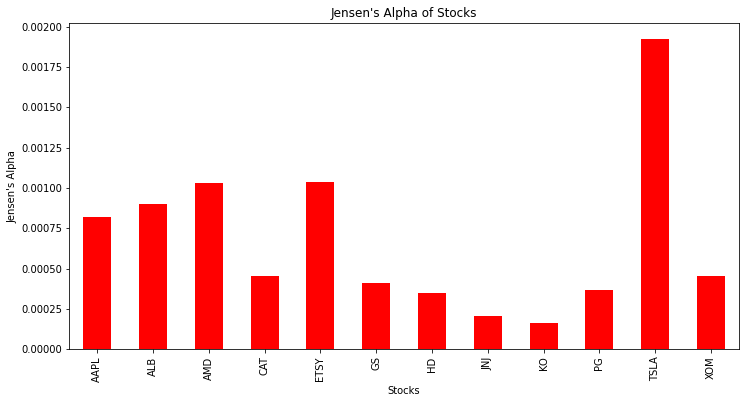

In [5]:
import matplotlib.pyplot as plt

# Create a bar chart for Sharpe Ratios
plt.figure(figsize=(12, 6))
performance_ratios['Sharpe Ratio'].plot(kind='bar', color='blue')
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Stocks')
plt.show()

# Create a bar chart for Treynor Ratios
plt.figure(figsize=(12, 6))
performance_ratios['Treynor Ratio'].plot(kind='bar', color='green')
plt.xlabel('Stocks')
plt.ylabel('Treynor Ratio')
plt.title('Treynor Ratios of Stocks')
plt.show()

# Create a bar chart for Jensen's Alpha
plt.figure(figsize=(12, 6))
performance_ratios["Jensen's Alpha"].plot(kind='bar', color='red')
plt.xlabel('Stocks')
plt.ylabel("Jensen's Alpha")
plt.title("Jensen's Alpha of Stocks")
plt.show()


In [8]:
# Calculate the total return on investment (ROI) for the period
total_roi = (data.iloc[-1] / data.iloc[0] - 1) * 100

# Calculate the annualized return
years = (data.index[-1] - data.index[0]).days / 365
annualized_return = ((data.iloc[-1] / data.iloc[0]) ** (1 / years) - 1) * 100

# Combine the results into a DataFrame
return_data = pd.DataFrame({'Total ROI (%)': total_roi, 'Annualized Return (%)': annualized_return})
return_data
return_data.to_excel("temp1.xlsx")

In [9]:
import pandas as pd

data = {'Fscore': [7, 7, 5, 6, 3, 4, 5, 4, 6, 4, 7, 8],
        'Total ROI (%)': [240.98, 192.37, 243.97, 109.81, 154.85, 117.89, 101.60, 53.66, 53.60, 83.78, 495.80, 97.65],
        'Annualized Return (%)': [35.95, 30.81, 36.24, 20.38, 26.39, 21.53, 19.19, 11.35, 11.34, 16.46, 56.33, 18.60],
        'Treynor Ratio': [0.41, 0.36, 0.23, -0.98, 0.30, 0.31, 5.12, 0.00, 0.00, -0.04, 0.48, -0.47],
        'Sharpe Ratio': [6.48, 4.83, 5.12, 4.34, 4.21, 4.44, 4.41, 3.60, 3.37, 4.67, 6.21, 3.92],
        'Jensen\'s Alpha': [0.08, 0.09, 0.10, 0.05, 0.10, 0.04, 0.03, 0.02, 0.02, 0.04, 0.19, 0.05]}

df = pd.DataFrame(data)


In [10]:
correlations = df.corr()
print(correlations['Fscore'])


Fscore                   1.000000
Total ROI (%)            0.365294
Annualized Return (%)    0.358130
Treynor Ratio           -0.138129
Sharpe Ratio             0.344834
Jensen's Alpha           0.281427
Name: Fscore, dtype: float64


In [45]:
import pandas as pd
import statsmodels.api as sm

data = {'Fscore': [7, 7, 5, 6, 3, 4, 5, 4, 6, 4, 7, 8],
        'Annualized Return (%)': [35.95, 30.81, 36.24, 20.38, 26.39, 21.53, 19.19, 11.35, 11.34, 16.46, 56.33, 18.60]}

df = pd.DataFrame(data)

# Define the dependent variable (y) and the independent variable (X)
y = df['Annualized Return (%)']
X = df['Fscore']

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

with open("summary.txt", "w") as f:
    f.write(model.summary().as_text())



c:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                              OLS Regression Results                             
Dep. Variable:     Annualized Return (%)   R-squared:                       0.128
Model:                               OLS   Adj. R-squared:                  0.041
Method:                    Least Squares   F-statistic:                     1.471
Date:                   Tue, 09 May 2023   Prob (F-statistic):              0.253
Time:                           09:33:57   Log-Likelihood:                -46.320
No. Observations:                     12   AIC:                             96.64
Df Residuals:                         10   BIC:                             97.61
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2281 

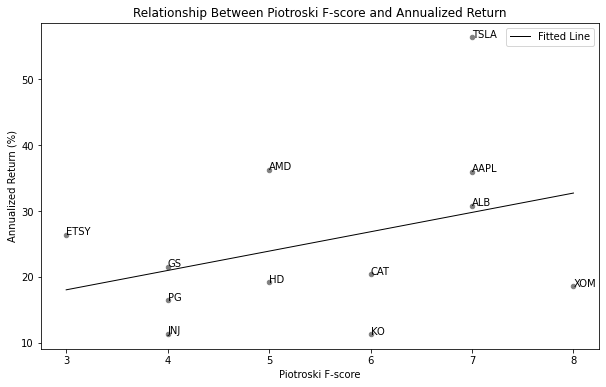

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Fscore'], df['Annualized Return (%)'], s=20, c='gray')
plt.xlabel('Piotroski F-score')
plt.ylabel('Annualized Return (%)')
plt.title('Relationship Between Piotroski F-score and Annualized Return')

# Add data labels for each point
tickers = ['AAPL', 'ALB', 'AMD', 'CAT', 'ETSY', 'GS', 'HD', 'JNJ', 'KO', 'PG', 'TSLA', 'XOM']
for i, stock in enumerate(tickers):
    plt.annotate(stock, (df.loc[i, 'Fscore'], df.loc[i, 'Annualized Return (%)']))

# Fit the regression line
x_values = np.linspace(min(df['Fscore']), max(df['Fscore']), 100)
y_values = model.params[0] + model.params[1] * x_values
plt.plot(x_values, y_values, color='black', linewidth=1, label='Fitted Line')

plt.legend()
plt.show()
